#### [Chapter 3](https://github.com/Ziaeemehr/netsci/blob/main/examples/chap_03.ipynb)

#### **Random Networks**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/examples/chap_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/netsci.git" -q

A random network consists of N nodes where each node pair is connected with probability p.
To construct a random network we follow these steps:
1) Start with N isolated nodes.
2) Select a node pair and generate a random number between 0 and 1. If the number exceeds p, connect the selected node pair with a link, otherwise leave them disconnected.
3) Repeat step (2) for each of the N(N-1)/2 node pairs.


In [1]:
import random
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from netsci.plot import plot_graph

In [2]:
LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)


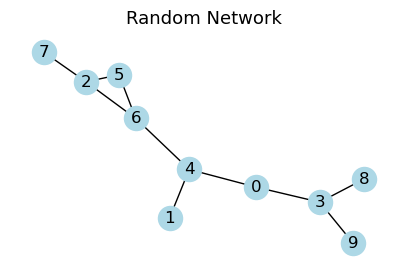

In [3]:

def create_random_network(N, p):
    G = nx.Graph()  # Initialize an empty graph
    G.add_nodes_from(range(N))  # Add N isolated nodes

    # Iterate through each possible node pair
    for i in range(N):
        for j in range(i + 1, N):
            if random.random() <= p:  # Generate a random number and compare it with p
                G.add_edge(i, j)  # Connect the nodes if the condition is met

    return G

# Example usage:
N = 10  # Number of nodes
p = 0.3  # Probability of edge creation

seed=2
random.seed(seed)
np.random.seed(seed)

random_network = create_random_network(N, p)
plot_graph(random_network, seed=2, figsize=(5, 3), title="Random Network")

# Drawing the network
plt.title("Random Network")
plt.show()


Other option would be to use the `nx.gnp_random_graph` function from NetworkX, which generates random graphs with a given number of nodes and a given probability of edge creation.

```python
G = nx.gnp_random_graph(N, p)
```


#### Binimial distribution

Degree distribution in a random network follows a binomial distribution.

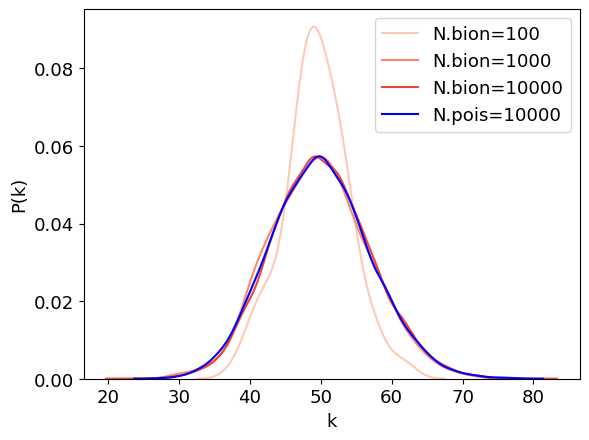

In [4]:
# make a random graph with N nodes and average degree of k
np.random.seed(2)

num_nodes = [100, 1000, 10000]
average_degree = 50
lambd = 50
colors1 = plt.cm.Reds(np.linspace(0.2, 0.6, len(num_nodes)))

for i in range(len(num_nodes)):
    probability = average_degree / num_nodes[i]
    graph_b = nx.gnp_random_graph(num_nodes[i], probability)
    degrees = [d for n, d in graph_b.degree()]
    sns.kdeplot(degrees, fill=False, label=f"N.bion={num_nodes[i]}", color=colors1[i])

s = np.random.poisson(lambd, num_nodes[-1])
sns.kdeplot(s, fill=False, label=f"N.pois={num_nodes[i]}", color='b')

plt.xlabel("k")
plt.ylabel("P(k)")
plt.legend();

#### The evolution of a random network

Connected Components:
Component 1: Size 1
Component 2: Size 18
Component 3: Size 1


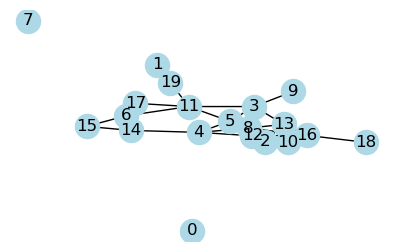

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Generate a random graph (Erdős-Rényi model)
n = 20  # number of nodes
p = 0.12  # probability of edge creation
G = nx.erdos_renyi_graph(n, p)

# Step 2: Find all connected components
connected_components = list(nx.connected_components(G))

# Step 3: Calculate the size of each connected component
component_sizes = [len(component) for component in connected_components]

# Display the graph and component sizes
print("Connected Components:")
for i, component in enumerate(connected_components):
    print(f"Component {i + 1}: Size {len(component)}")

# Optionally, visualize the graph
plot_graph(G, seed=2, figsize=(5, 3))

Plotting the size of giant connected component vs average degree

N=10000, Ln(N)= 9.210340371976182
average k =      0.100, giant_component_size=         4
average k =      0.500, giant_component_size=        17
average k =      0.900, giant_component_size=       126
average k =      1.000, giant_component_size=       300
average k =      1.100, giant_component_size=      1825
average k =      2.001, giant_component_size=      7834
average k =      2.902, giant_component_size=      9352
average k =      3.803, giant_component_size=      9768
average k =      4.705, giant_component_size=      9905
average k =      5.606, giant_component_size=      9957
average k =      6.507, giant_component_size=      9986
average k =      7.408, giant_component_size=      9996
average k =      8.309, giant_component_size=      9999
average k =      9.210, giant_component_size=     10000


Text(0, 0.5, '$N_G / N$')

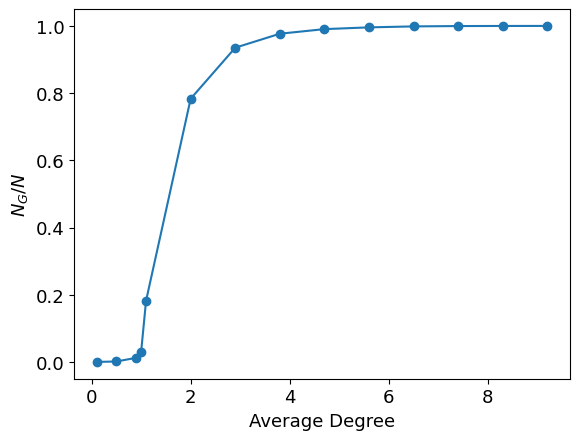

In [6]:
N = int(1e4)
print(f"N={N}, Ln(N)= {np.log(N)}")
k_avg = [.1, 0.5, 0.9, 1.0] + np.linspace(1.1, np.log(N), 10).tolist()
giant_component_sizes = []
for i in range(len(k_avg)):
    p = k_avg[i] / N 
    G = nx.erdos_renyi_graph(N, p)
    connected_components = list(nx.connected_components(G))
    component_sizes = [len(component) for component in connected_components]
    giant_component_size = max(component_sizes)
    giant_component_sizes.append(giant_component_size)
    
    print(f"average k = {k_avg[i]:10.3f}, giant_component_size={giant_component_size:10d}")
    
giant_component_sizes = np.array(giant_component_sizes)/N
plt.plot(k_avg, giant_component_sizes, marker='o', label='Giant Component Size')
plt.xlabel(r'Average Degree')
plt.ylabel(r'$N_G / N$');